## Datset Background 

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Acknowledgements

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Inspiration

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?


### Importing libraries that are required to build this project

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

### Task 1: Retrieving and Preparing the Data

In [2]:
diabetes = pd.read_csv("./diabetes.csv")

#### created DataFrame "diabegtes"

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Reteriving first five columns of the diabetes dataset

In [4]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### Reteriving last five columns of the diabetes datset

In [5]:
diabetes.shape

(768, 9)

#### diabetes datset have 768 rows and 9 columns.

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Observations
1. There is no missing value as such but we have value = 0 for some variable where 0 is not possible, hence we will consider them as missing values and impute them in further steps. Columns that cannot have 0 as their value (and include 0): Glucose, BloodPressure, SkinThickness, Insulin, BMI

2. We have only integer and float type of data types. Out of which BMI and DiabetesPedigreeFunction are continuous and rest are discrete variables.

### Marking NaN

In [8]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[cols] =diabetes[cols].apply(lambda x: x.replace(0, np.nan))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Missing Values Analysis

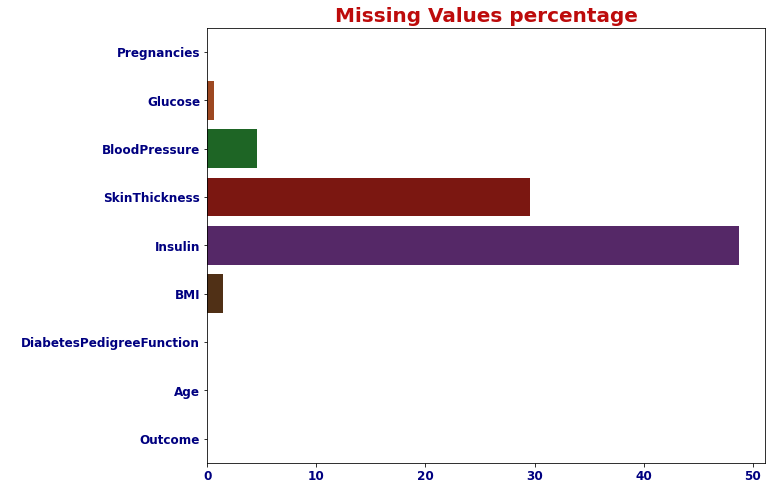

In [9]:
missing_val_diabetes = ((diabetes.isnull().sum() / diabetes.shape[0])*100).to_frame().reset_index().rename({'index': 'columns', 0: 'Missing Values percentage'}, axis = 1)

plt.figure(figsize = (10,8))
sns.barplot(data = missing_val_diabetes, x = 'Missing Values percentage', y = 'columns',palette='dark')
plt.title('Missing Values percentage', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');

#### Observations
- Insulin has highest missing value percentage (around 49 %)
- SkinThickness and BloodPressure has around 30 % and around 5 % missing values respectively.
- BMI and Glucose has around 2 % and around 1 %  missing values respectively.

#### Strategy to Impute Missing Values:
- Since Glucose, BloodPressure, SkinThickness, Insulin, BMI in given data are continuous numerical numbers. We will raplace NaN values with mean value to impute the missing values.

In [10]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
# mean of values in the same column
diabetes['Glucose'].fillna(value=diabetes['Glucose'].mean(), inplace=True)
diabetes['BloodPressure'].fillna(value=diabetes['BloodPressure'].mean(), inplace=True)
diabetes['SkinThickness'].fillna(value=diabetes['SkinThickness'].mean(), inplace=True)
diabetes['Insulin'].fillna(value=diabetes['Insulin'].mean(), inplace=True)
diabetes['BMI'].fillna(value=diabetes['BMI'].mean(), inplace=True)

In [12]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


#### Checking the datatypes of the column and whteher any null vlaues present in of the columns.

In [13]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### There are no nul values in tghe datset.

In [14]:
diabetes.isnull().values.any()

False

In [15]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

####  There are 500 patients with no biabetes and 268 patients who are having diabetes.

In [16]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


#### From the above data we can conclude that if the patient have high Insulin, Glucose and BMI  then he/she is more likely to get diabetes then the patient with low Insulin, Glucose and BMI.

### Task 2: Data Exploration

#### Task 2.1 Exploring all numerical variables

Text(0.5, 1.0, 'Distribution of Pregnancies variable')

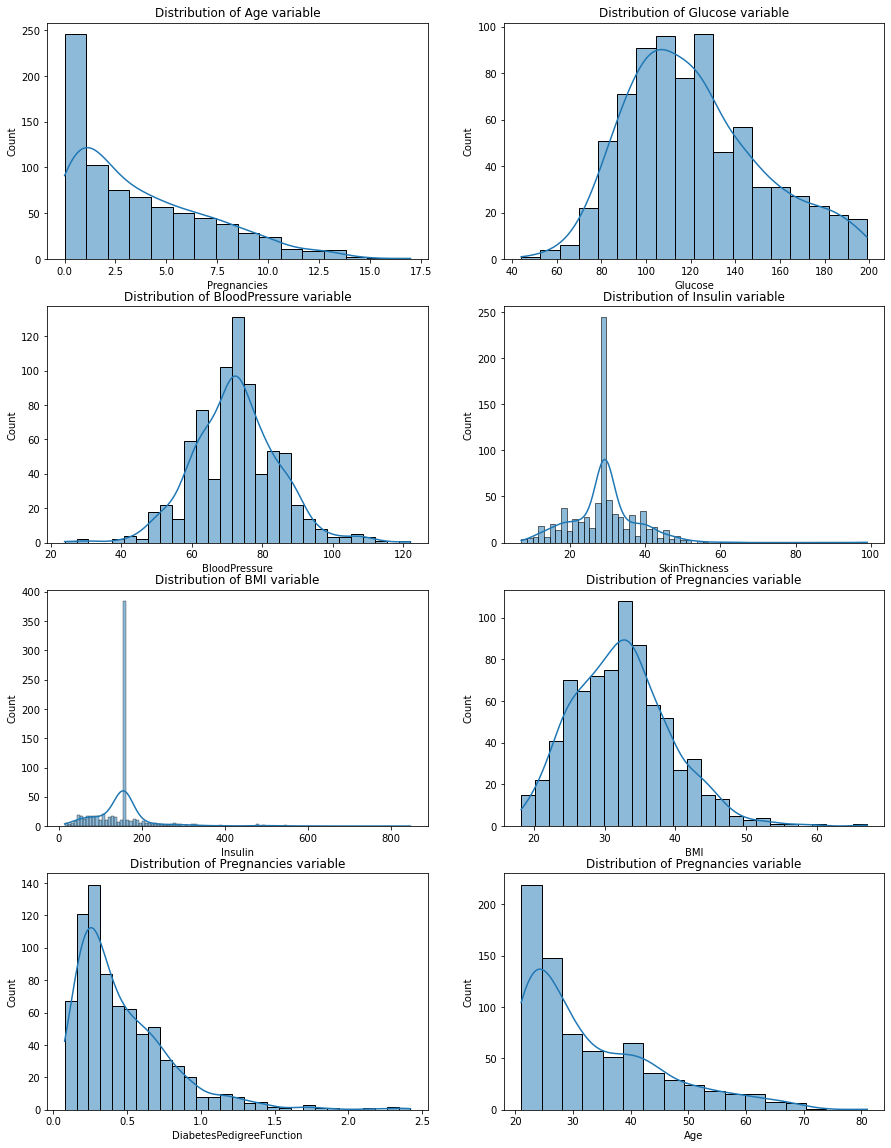

In [17]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.histplot(data=diabetes, x="Pregnancies", kde=True)
plt.title("Distribution of Age variable")

plt.subplot(4,2,2)
sns.histplot(data=diabetes, x="Glucose", kde=True)
plt.title("Distribution of Glucose variable")

plt.subplot(4,2,3)
sns.histplot(data=diabetes, x="BloodPressure", kde=True)
plt.title("Distribution of BloodPressure variable")

plt.subplot(4,2,4)
sns.histplot(data=diabetes, x="SkinThickness", kde=True)
plt.title("Distribution of Insulin variable")

plt.subplot(4,2,5)
sns.histplot(data=diabetes, x="Insulin", kde=True)
plt.title("Distribution of BMI variable")

plt.subplot(4,2,6)
sns.histplot(data=diabetes, x="BMI", kde=True)
plt.title("Distribution of Pregnancies variable")

plt.subplot(4,2,7)
sns.histplot(data=diabetes, x="DiabetesPedigreeFunction", kde=True)
plt.title("Distribution of Pregnancies variable")

plt.subplot(4,2,8)
sns.histplot(data=diabetes, x="Age", kde=True)
plt.title("Distribution of Pregnancies variable")

#### "Age","Insulin", "Pregnancies", "DiabetesPedigreeFunction", and "SkinTickness" Features are Right-skewed distributions. Where as "Glucose" is Left-skewed distribution. Need to Normalise the data to make it more normal distributed.


##### Analyzing Categorical Variables

Text(0.5, 1.0, 'Distribution of Outcomes variable')

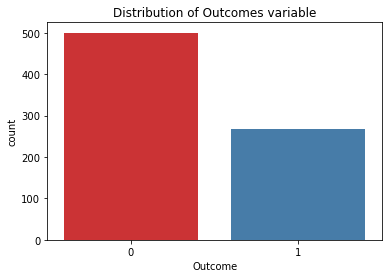

In [18]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(x="Outcome", data=diabetes,palette="Set1")
plt.title("Distribution of Outcomes variable")

#### As we can observe from above data is that number of patients that have diabetes are half in number.

### Task2.2 Relationship Between Variables

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

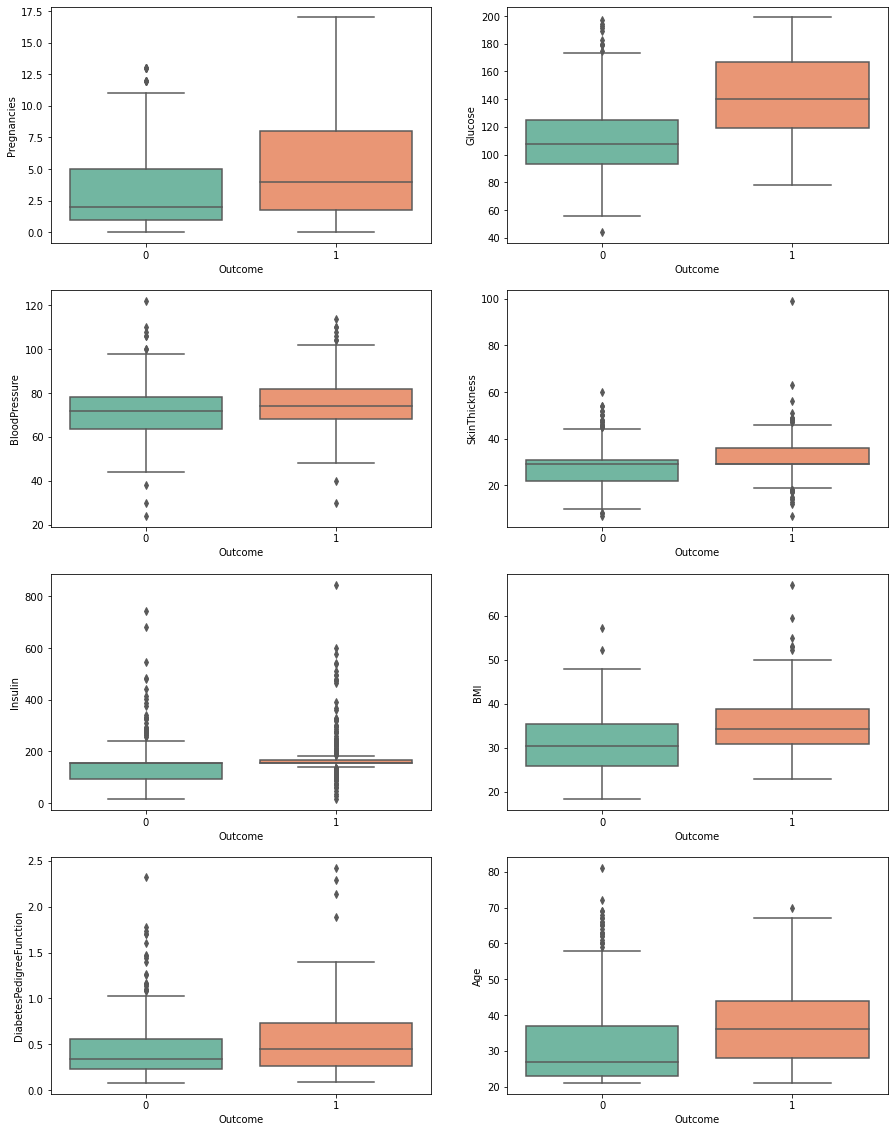

In [19]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.boxplot(x='Outcome',y='Pregnancies', data=diabetes,palette='Set2')

plt.subplot(4,2,2)
sns.boxplot(x='Outcome',y='Glucose', data=diabetes,palette='Set2')

plt.subplot(4,2,3)
sns.boxplot(x='Outcome',y='BloodPressure', data=diabetes,palette='Set2')

plt.subplot(4,2,4)
sns.boxplot(x='Outcome',y='SkinThickness', data=diabetes,palette='Set2')

plt.subplot(4,2,5)
sns.boxplot(x='Outcome',y='Insulin', data=diabetes,palette='Set2')

plt.subplot(4,2,6)
sns.boxplot(x='Outcome',y='BMI', data=diabetes,palette='Set2')

plt.subplot(4,2,7)
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction', data=diabetes,palette='Set2')

plt.subplot(4,2,8)
sns.boxplot(x='Outcome',y='Age', data=diabetes,palette='Set2')

### Observations:
- Above Graphs are Boxen Plots of all features divided by Target variable (Outcome)

#### Pregnencies vs Outcome

1. Pregnent Non diabetic and pregnent diabetic patients have same Median
2. Non diabetic have more variance than diabetic patient.
3. Outliers are present in both groups but non-diabetic is more skewed

#### Glucose vs Outcome

1. Non diabetic patient Glucose level have more spread when compared to Diabetic Patient glucose level.
2. Both have outliers but Non diabetic patient Glucose level have more spread-out outliers
3. Both have same Median, but IQR of Diabetic patients is little higher than Non-diabetic patients.

#### Blood Pressure vs Outcome

1. Blood Pressure of Diabetic Patients and Non diabetic patients have same median and IQR
2. They both have outliers and approximately same spread.
3. Patients who have Diabeties seem to have extreme low blood pressure.

#### SkinThickness vs Outcome

1. SkinThickness of Diabetic Patients and Non diabetic patients have same median and but IQR of Non-diabetic patients are little higher than diabetic patients.
2. Outliers in both groups but have one Diabetic Patient seem to have a very high value of SkinThikness.


#### Insuline vs Outcome

1. Insuline value in Non Diabetic patients is has high variance compared to Insulin value in Diabetic Patients.
2. Non Diabetic patients has slightly higher insulin median and lower IQR than Diabetic patients
3. Outliers are more in non-diabetic patients than in diabetic patients.

#### BMI vs Outcome

1. BMI of non diabetic patients have same median and slightl higher IQR than diabetic patients
2. Outliers present in both but non-diabetic patients have more extreme outliers.

#### DiabetesPedigreeFunction vs Outcome

1. DiabetesPedigreeFunction in non-diabetic patients are almost similar interms of median and IQR
2. Outliers are present in both but non-diabetic patients have more outliers and variance.

#### Age vs Outcome

1. Age of Diabetic patients has higher median.
2. Diabetic patients age has more outliers, higher IQR and variance which shows that diabeties is observed in both young and old people.


### Outlier Treatment
- Using Capping and Flooring method to replace outliers

In [20]:
## Creating a list of Outliers columns
outliers_cols = []
for col in diabetes.drop(['Outcome'], axis = 1).columns:
  q25, q75 = np.percentile(diabetes[col], 25), np.percentile(diabetes[col], 75)
  iqr = q75 - q25
  outlier_th = iqr*1.5
  lower_th = q25 - outlier_th
  upper_th = q75 - outlier_th 
  if any(diabetes[col].values < lower_th) or any(diabetes[col].values > upper_th):
    outliers_cols.append(col)

print(outliers_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [21]:
### Treating Outliers
for col in outliers_cols:
  percentiles = diabetes[col].quantile([0.01, 0.99]).values
  diabetes[col] = np.clip(diabetes[col], percentiles[0], percentiles[1])

<AxesSubplot:xlabel='Age', ylabel='count'>

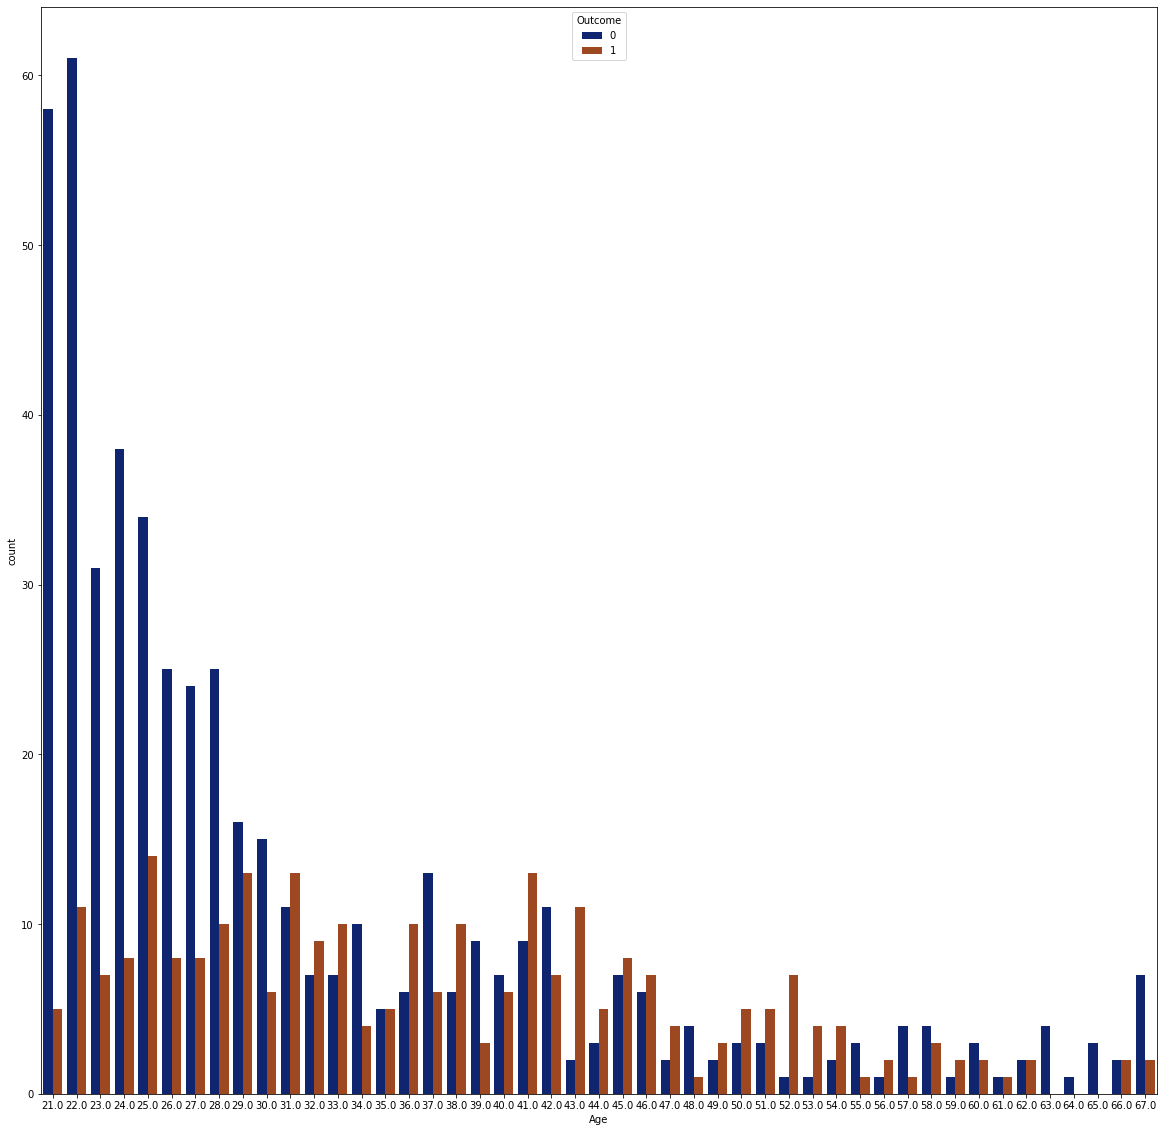

In [22]:
plt.figure(figsize = (20,20))
sns.countplot(x = diabetes['Age'],  data = diabetes, hue = 'Outcome', palette = 'dark' )

### Observations:
- Diabeties are most common in age of 30-35, 44-50 and 55+ as these age groups have more diabetic patient than non-diabetic patient.

In [23]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127922,0.211134,0.095471,0.069264,0.025377,-0.028225,0.549591,0.219811
Glucose,0.127922,1.000000,0.219416,0.182752,0.430800,0.231959,0.125874,0.272170,0.493775
BloodPressure,0.211134,0.219416,1.000000,0.209101,0.077223,0.290720,0.004381,0.332970,0.170207
SkinThickness,0.095471,0.182752,0.209101,1.000000,0.184568,0.558705,0.080274,0.121358,0.215954
Insulin,0.069264,0.430800,0.077223,0.184568,1.000000,0.179498,0.077627,0.140630,0.226867
BMI,0.025377,0.231959,0.290720,0.558705,0.179498,1.000000,0.138286,0.033962,0.312575
DiabetesPedigreeFunction,-0.028225,0.125874,0.004381,0.080274,0.077627,0.138286,1.000000,0.039607,0.174064
Age,0.549591,0.272170,0.332970,0.121358,0.140630,0.033962,0.039607,1.000000,0.242215
Outcome,0.219811,0.493775,0.170207,0.215954,0.226867,0.312575,0.174064,0.242215,1.000000


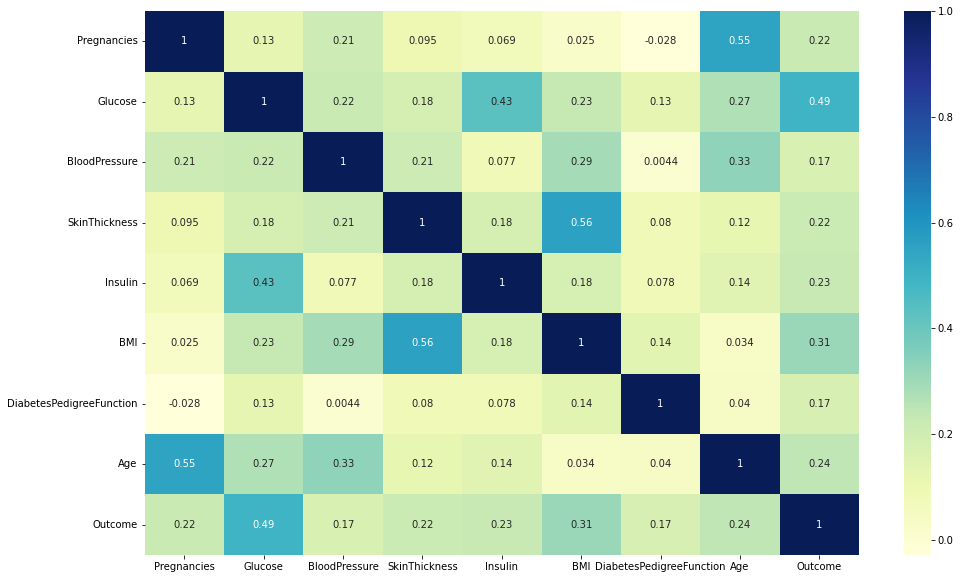

In [24]:
# Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(diabetes.corr(method='pearson'), annot=True,cmap="YlGnBu")
plt.show()

### Observations:
- Outcome (Target Variable) doesn't have much correlation with other variables.
- Pregnancies and Age are correlated.
- SkinThickness and BMI are highly correlated.
- Glucose and Insulin are highly correlated.

# Task 3: Data Modeling
### Training and Testing the data
### Splitting Data & Feature Scaling

In [25]:
# features of the DataFrame
X = diabetes.drop(["Outcome"], axis= 1)
# Targetg of the DataFrame
y = diabetes.iloc[:,-1]

### Train and Test Model

In [26]:
# Spliting the data into train and test set (70:30)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=2)

In [27]:
print("X-train shape: {}".format(X_train.shape))
print("y-train shape: {}".format(y_train.shape))

X-train shape: (537, 8)
y-train shape: (537,)


In [28]:
print("X-test shape: {}".format(X_test.shape))
print("y-test shape: {}".format(y_test.shape))

X-test shape: (231, 8)
y-test shape: (231,)


### K-Nearest Neighbors classifier

Minimum error:- 0.21645021645021645 at K = 27


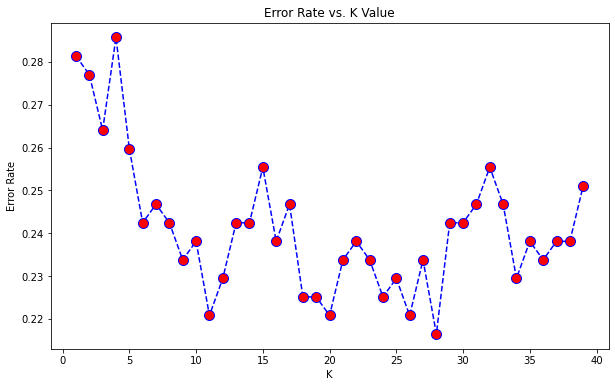

In [29]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

### Observations:
- From the above  plot, you can see that the smallest error we got is 0.216 at K=27. Further on, we visualize the plot between accuracy and K value.

Maximum accuracy:- 0.7835497835497836 at K = 27


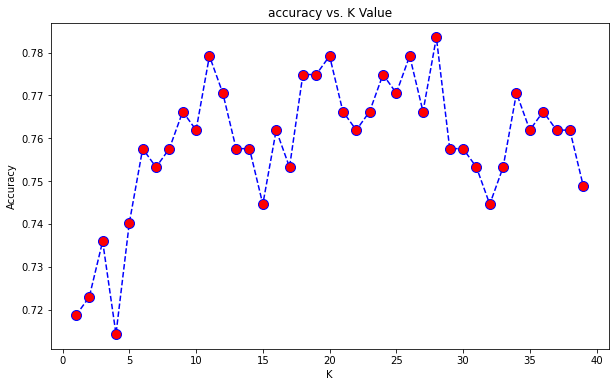

In [30]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

### Observations:
- From the above  plot, you can see that the highest accuracy we got is 0.78 at K=27.

In [31]:
# train and predict 
k = 27
kn_clf = KNeighborsClassifier(n_neighbors = k)
kn_clf.fit(X_train,y_train)
print("Test set score: {:.2f}" .format(kn_clf.score(X_test,y_test)))

Test set score: 0.77


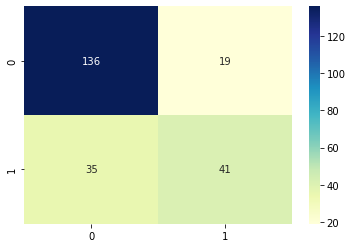

In [32]:
# previewing confusion matrix
prediction = kn_clf.predict(X_test)
cm = confusion_matrix(y_test, prediction)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

In [33]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       155
           1       0.68      0.54      0.60        76

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



### Decision Tree


In [34]:
# train and test
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
print("Test set score: {:.2f}" .format(dt_clf.score(X_test,y_test)))

Test set score: 0.73


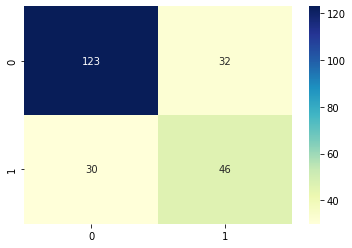

In [35]:
# previewing confusion matrix
predict = dt_clf.predict(X_test)
cm = confusion_matrix(y_test, predict)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

In [36]:
# previewing classification report 
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       155
           1       0.59      0.61      0.60        76

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



##### Optimizing Decision Tree Performance

In [37]:
dt_clf1 = DecisionTreeClassifier(max_leaf_nodes = 8)
dt_clf1.fit(X_train,y_train)
print("Test set score: {:.2f}" .format(dt_clf1.score(X_test,y_test)))

Test set score: 0.77


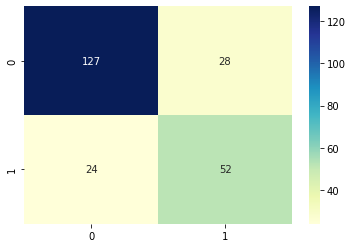

In [38]:
# previewing confusion matrix
pr = dt_clf1.predict(X_test)
cm = confusion_matrix(y_test, pr)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

In [39]:
# previewing classification report 
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       155
           1       0.65      0.68      0.67        76

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.78      0.77      0.78       231



[Text(167.40000000000003, 199.32, 'X[1] <= 127.5\ngini = 0.459\nsamples = 537\nvalue = [345, 192]'),
 Text(66.96000000000001, 163.07999999999998, 'X[5] <= 26.45\ngini = 0.313\nsamples = 330\nvalue = [266, 64]'),
 Text(33.480000000000004, 126.83999999999999, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(100.44000000000001, 126.83999999999999, 'X[7] <= 28.5\ngini = 0.39\nsamples = 241\nvalue = [177, 64]'),
 Text(66.96000000000001, 90.6, 'gini = 0.226\nsamples = 123\nvalue = [107, 16]'),
 Text(133.92000000000002, 90.6, 'X[4] <= 112.0\ngini = 0.483\nsamples = 118\nvalue = [70, 48]'),
 Text(100.44000000000001, 54.359999999999985, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(167.40000000000003, 54.359999999999985, 'X[6] <= 0.613\ngini = 0.5\nsamples = 97\nvalue = [50, 47]'),
 Text(133.92000000000002, 18.119999999999976, 'gini = 0.469\nsamples = 72\nvalue = [45, 27]'),
 Text(200.88000000000002, 18.119999999999976, 'gini = 0.32\nsamples = 25\nvalue = [5, 20]'),
 Text(267.8400000

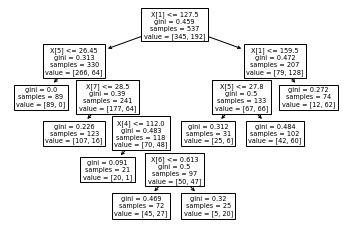

In [40]:
# tree visualization
tree.plot_tree(dt_clf1)

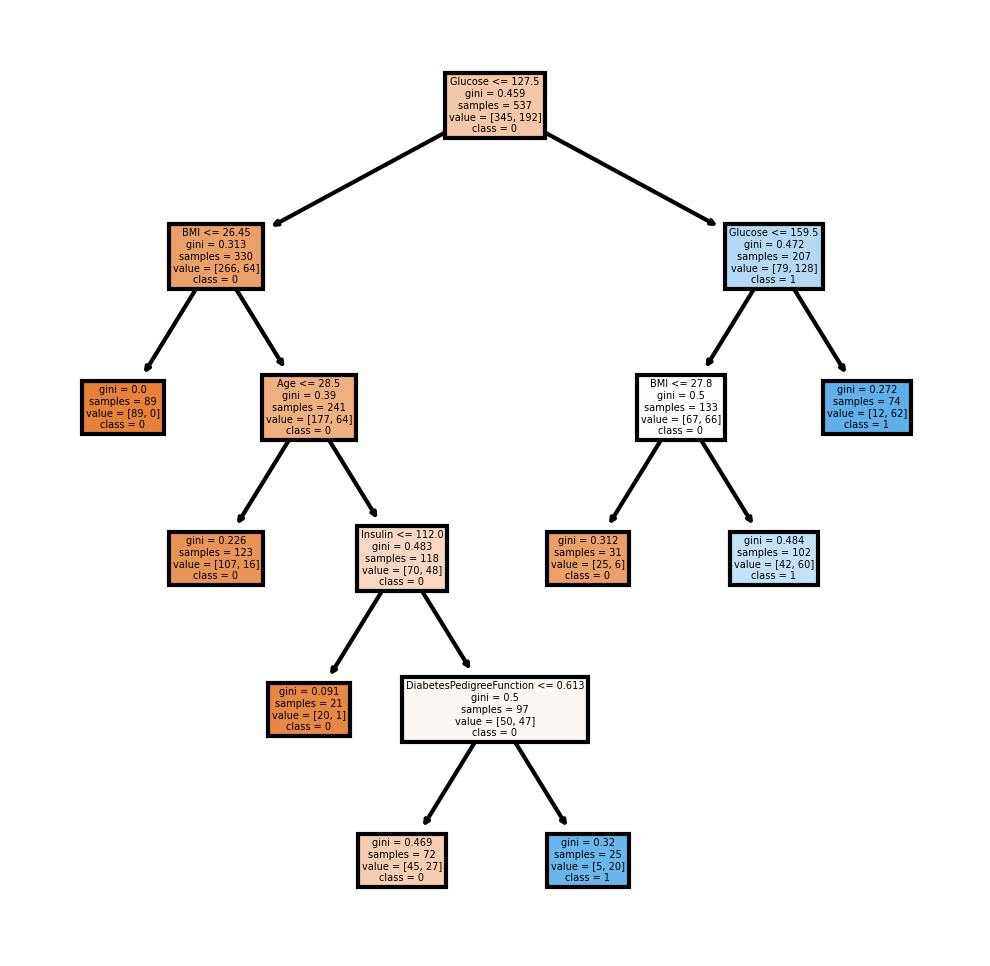

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
cn=['0','1']
tree.plot_tree(dt_clf1,
               feature_names = features, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

### LOGISTIC REGRESSION 

In [42]:
# train and test
dt_clf = LogisticRegression(solver= "liblinear")
dt_clf.fit(X_train,y_train)
print("Test set score: {:.2f}" .format(dt_clf.score(X_test,y_test)))

Test set score: 0.74


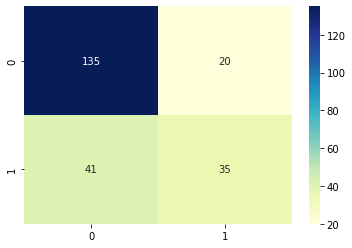

In [43]:
# previewing confusion matrix
pr = dt_clf.predict(X_test)
cm = confusion_matrix(y_test, pr)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

In [44]:
# previewing classification report 
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       155
           1       0.64      0.46      0.53        76

    accuracy                           0.74       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.74      0.72       231

